In [1]:
# Python 3.7

In [2]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from pypolyagamma import logistic, PyPolyaGamma

In [3]:
npr.seed(0)

In [4]:
# Consider a simple binomial model with unknown probability
# Model the probability as the logistic of a scalar Gaussian.
N = 10
mu = 0.0
sigmasq = 1.0
x_true = npr.normal(mu, np.sqrt(sigmasq))
p_true = logistic(x_true)
y = npr.binomial(N, p_true)

In [5]:
# Gibbs sample the posterior distribution p(x | y)
# Introduce PG(N,0) auxiliary variables to render
# the model conjugate.  First, initialize the PG
# sampler and the model parameters.
N_samples = 10000
pg = PyPolyaGamma(seed=0)
xs = np.zeros(N_samples)
omegas = np.ones(N_samples)

In [6]:
# Now run the Gibbs sampler
for i in range(1, N_samples):
    # Sample omega given x, y from its PG conditional
    omegas[i] = pg.pgdraw(N, xs[i-1])

    # Sample x given omega, y from its Gaussian conditional
    sigmasq_hat = 1./(1. / sigmasq + omegas[i])
    mu_hat = sigmasq_hat * (mu / sigmasq + (y - N / 2.))
    xs[i] = npr.normal(mu_hat, np.sqrt(sigmasq_hat))


In [7]:
# Compute the true posterior density
xx = np.linspace(x_true-3., x_true+3, 1000)
prior = 1./np.sqrt(2 * np.pi * sigmasq) * np.exp(-0.5 * (xx - mu)**2 / sigmasq)
lkhd = logistic(xx) ** y * (1-logistic(xx))**(N-y)
post = prior * lkhd
post /= np.trapz(post, xx)

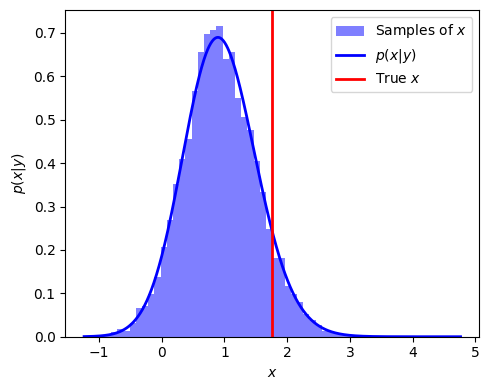

In [8]:
# Plot the results
plt.figure(figsize=(5,4))
plt.hist(xs, 50, density=True, color='b', alpha=0.5, label="Samples of $x$")
plt.plot(xx, post, '-b', lw=2, label="$p(x | y)$")
ylim = plt.ylim()
plt.plot([x_true, x_true], ylim, '-r', lw=2, label="True $x$")
plt.ylim(ylim)
plt.xlabel("$x$")
plt.ylabel("$p(x | y)$")
plt.legend(loc="upper right", fontsize=10)
plt.tight_layout()
#plt.savefig("aux/binomial.png")
plt.show()